In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.io import loadmat


In [3]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

#all_responses=flatten_extend(all_responses)


In [59]:
df =  pd.read_csv('data/868348_av_v_fle_2024-10-09_19h30.52.159.csv')
# Create a new column that will represent the audioDelayAimed in terms of ms
df['audioDelayAimed_ms'] = df['audioDelaysAimed']*16.6667
df['visualDelayAimed_ms'] = df['visualDelaysAimed']*16.6667
df['audioDelayReal_ms'] =(df["audioTime"]-df["flashTime"])*1000
df

,Unnamed: 0,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum,flashPostionX,bar_at_flash_X,directions,audioDelayAimed_ms,visualDelayAimed_ms,audioDelayReal_ms
0,0,0,0.782928,0.673647,-12,2,1.314014,0.466204,0.664472,1,-13.170456,5.091446,1,-200.0004,33.3334,-198.2680
1,1,1,0.451240,0.401977,0,-2,1.314014,0.398951,0.398951,2,-122.666939,-140.928841,1,0.0000,-33.3334,0.0000
2,2,0,0.650240,0.890438,0,0,1.314014,0.882235,0.882235,3,123.957307,123.957307,1,0.0000,0.0000,0.0000
3,3,0,0.634687,0.486474,8,0,1.314014,0.614254,0.481128,4,95.527598,95.527598,-1,133.3336,0.0000,133.1259
4,4,1,0.568267,0.736408,-8,-4,1.314014,0.594722,0.728645,5,-77.429488,-40.905684,-1,-133.3336,-66.6668,-133.9226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,1,0.499933,0.437913,8,-4,1.314014,0.563542,0.430665,276,86.330466,122.854269,-1,133.3336,-66.6668,132.8772
276,276,0,0.416534,0.563145,4,4,1.314014,0.613199,0.547348,277,-95.446058,-58.922254,1,66.6668,66.6668,65.8512
277,277,0,0.534515,0.525071,12,4,1.314014,0.715481,0.515935,278,-113.229882,-76.706078,1,200.0004,66.6668,199.5455
278,278,0,0.550732,0.739019,4,2,1.314014,0.796400,0.729715,279,22.660984,40.922886,1,66.6668,33.3334,66.6841


In [59]:
# Load data loadmat
data = loadmat('data/874707_av_v_fle_2024-10-09_12h54.02.373.mat')
   
# Zip the arrays to the shortest length
zipped_data = list(zip(data["responses"], data["responseTimes"], data["incidentTimesAimed"], data["audioDelaysAimed"], data["visualDelaysAimed"], data["trialDurations"], data["audioTime"], data["flashTime"], data["trialNum"]))
# Unzip the data back into individual lists
all_responses, responseTimes, incidentTimes, audioDelays, visualDelays, trial_durs, audioTime, flashTime, trialNum = map(list, zip(*zipped_data))
df = pd.DataFrame({
    'responses': flatten_extend(all_responses),
    'responseTimes': flatten_extend(responseTimes),
    'incidentTimesAimed': flatten_extend(incidentTimes),
    'audioDelaysAimed': flatten_extend(audioDelays),
    'visualDelaysAimed': flatten_extend(visualDelays),
    'trialDurations': flatten_extend(trial_durs),
    'audioTime': flatten_extend(audioTime),
    'flashTime': flatten_extend(flashTime),
    'trialNum': flatten_extend(trialNum)
})

In [60]:
df

,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum
0,0,0.876041,0.867255,-1,0,1.314014,0.814313,0.830827,1
1,0,0.396931,0.661106,0,-2,1.314014,0.580782,0.580782,2
2,0,0.545424,0.692604,3,-4,1.314014,0.629152,0.579116,3
3,0,0.260357,0.690887,3,4,1.314014,0.763413,0.713278,4
4,1,0.313373,0.510160,-3,-2,1.314014,0.381849,0.437572,5
...,...,...,...,...,...,...,...,...,...
245,0,0.311638,0.695192,0,-4,1.314014,0.580521,0.580521,246
246,0,0.761964,0.881870,0,0,1.314014,0.847070,0.847070,247
247,0,0.145155,0.504913,3,-2,1.314014,0.481715,0.432225,248
248,0,0.177258,0.680330,1,4,1.314014,0.715263,0.698369,249


C:\Users\omeru\AppData\Local\Temp\ipykernel_35104\4199628921.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='visualDelayAimed_ms', y='responses', hue='audioDelayAimed_ms', data=grouped_data, ci=None, legend=False)


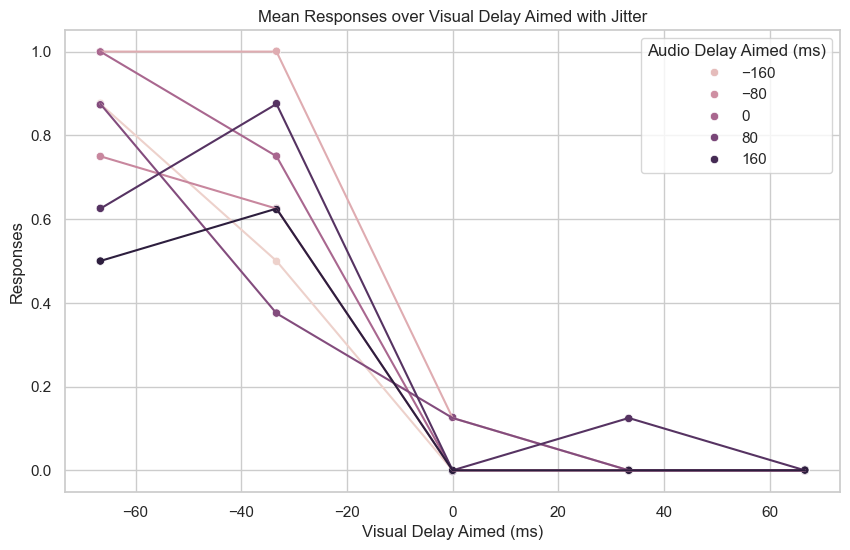

In [65]:

# now plot the mean responses for each visual delay aimed and audio delay aimed
# Group the data by visualDelayAimed and audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby(['visualDelayAimed_ms', 'audioDelayAimed_ms']).mean().reset_index()
grouped_data


# Assuming 'responses' is already in the grouped_data DataFrame
# Create a jitter effect
jitter_strength = .001 # Adjust as needed
grouped_data['visualDelayAimed_ms_jittered'] = grouped_data['visualDelayAimed_ms'] + np.random.normal(0, jitter_strength, size=len(grouped_data))
grouped_data['responses_jittered'] = grouped_data['responses'] + np.random.normal(0, jitter_strength, size=len(grouped_data))

# Plot the data with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms_jittered', y='responses_jittered', hue='audioDelayAimed_ms', data=grouped_data)
# connect the points with lines
sns.lineplot(x='visualDelayAimed_ms', y='responses', hue='audioDelayAimed_ms', data=grouped_data, ci=None, legend=False)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
#plt.ylim(0, 1)
plt.title('Mean Responses over Visual Delay Aimed with Jitter')
plt.legend(title='Audio Delay Aimed (ms)')
plt.show()

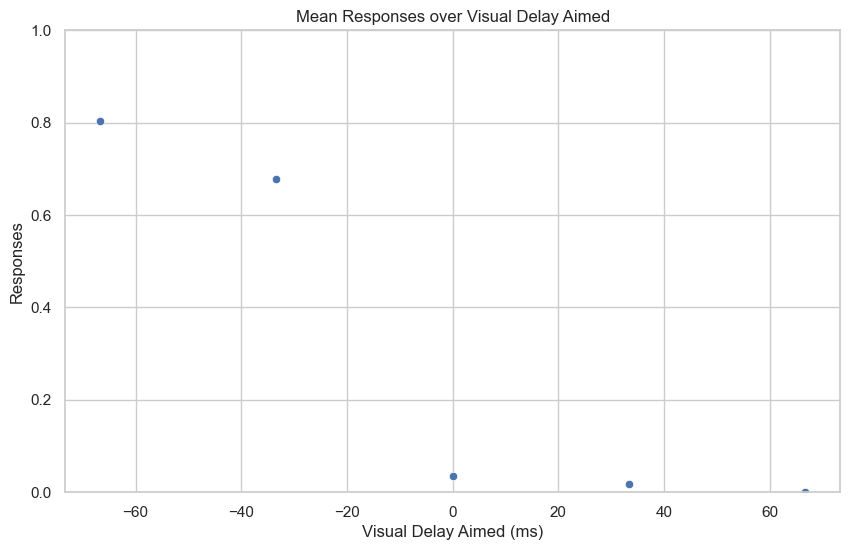

In [62]:
# Now plot only the mean responses for each visual delay aimed
# Group the data by visualDelayAimed and calculate the mean of responses
grouped_data = df.groupby('visualDelayAimed_ms').mean().reset_index()
grouped_data

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms', y='responses', data=grouped_data)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Mean Responses over Visual Delay Aimed')
plt.ylim(0,1)
plt.show()



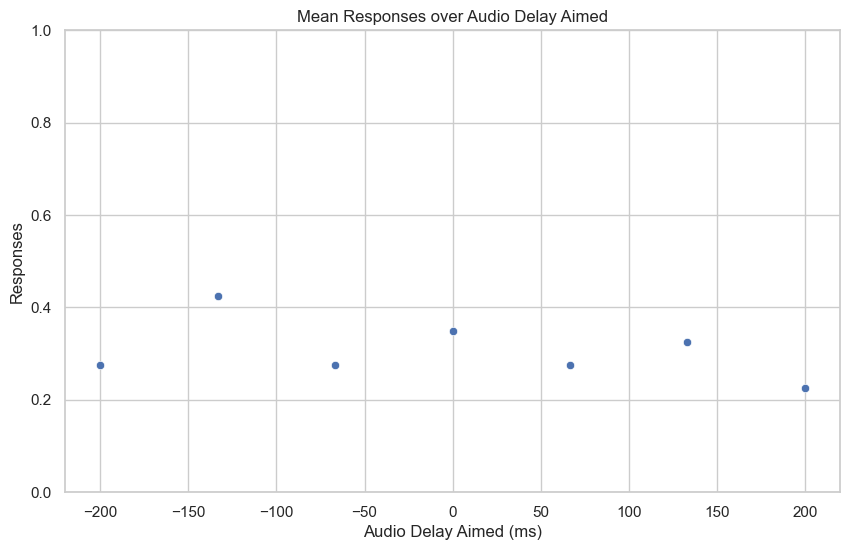

In [63]:
# Now plot the mean responses for only audio delay aimed
# Group the data by audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby('audioDelayAimed_ms').mean().reset_index()
grouped_data
 
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='audioDelayAimed_ms', y='responses', data=grouped_data)
plt.xlabel('Audio Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Mean Responses over Audio Delay Aimed')
plt.ylim(0,1)
plt.show()

